In [284]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [84]:
image_path=['china.jpg','india.jpg','Iran.jpg','Israel.jpg','japan.jpg','korea.jpg','saudi.jpg','arab.jpg']

데이터 불러오기


In [89]:
df =pd.read_csv('world_soccer.csv',index_col=0)
df

,overall,potential,name,country,value,wage,age,season
0,83,83,S. Kagawa,Japan,19000000,140000,25,15
1,79,79,K. Honda,Japan,8500000,120000,28,15
2,78,78,Lee Dong Gook,Korea Republic,3000000,60000,35,15
3,77,77,S. Okazaki,Japan,6000000,70000,28,15
4,76,81,H. Son,Korea Republic,4500000,70000,21,15
...,...,...,...,...,...,...,...,...
15604,47,55,M. Mewlan,China PR,100000,2000,19,24
15605,47,53,Wu Yuhang,China PR,70000,1000,22,24
15606,47,54,Yin Jie,China PR,90000,1000,21,24
15607,47,55,Jin Liangkuan,China PR,100000,1000,21,24


데이터 전처리2 과정 가치와 임금이 0이 아닌 것만 가져옴

In [91]:
df= df[(df['value'] != 0) & (df['wage'] != 0)].reset_index(drop=True)
df

,overall,potential,name,country,value,wage,age,season
0,83,83,S. Kagawa,Japan,19000000,140000,25,15
1,79,79,K. Honda,Japan,8500000,120000,28,15
2,78,78,Lee Dong Gook,Korea Republic,3000000,60000,35,15
3,77,77,S. Okazaki,Japan,6000000,70000,28,15
4,76,81,H. Son,Korea Republic,4500000,70000,21,15
...,...,...,...,...,...,...,...,...
15194,47,55,M. Mewlan,China PR,100000,2000,19,24
15195,47,53,Wu Yuhang,China PR,70000,1000,22,24
15196,47,54,Yin Jie,China PR,90000,1000,21,24
15197,47,55,Jin Liangkuan,China PR,100000,1000,21,24


데이터 전처리3 나라 기준으로 너무 적은 나라의 행을 제거

In [93]:
idx =df['country'].value_counts()[df['country'].value_counts() > 60].index
idx

Index(['Saudi Arabia', 'Korea Republic', 'Japan', 'China PR', 'Australia',
       'India', 'Iran', 'United Arab Emirates', 'Iraq', 'Israel'],
      dtype='object')

In [94]:
df= df[df.country.isin(idx)]
df

,overall,potential,name,country,value,wage,age,season
0,83,83,S. Kagawa,Japan,19000000,140000,25,15
1,79,79,K. Honda,Japan,8500000,120000,28,15
2,78,78,Lee Dong Gook,Korea Republic,3000000,60000,35,15
3,77,77,S. Okazaki,Japan,6000000,70000,28,15
4,76,81,H. Son,Korea Republic,4500000,70000,21,15
...,...,...,...,...,...,...,...,...
15194,47,55,M. Mewlan,China PR,100000,2000,19,24
15195,47,53,Wu Yuhang,China PR,70000,1000,22,24
15196,47,54,Yin Jie,China PR,90000,1000,21,24
15197,47,55,Jin Liangkuan,China PR,100000,1000,21,24


아시아 시장가치 평균 시각화

In [90]:
condi = df.groupby('season')['value'].mean()
condi= pd.DataFrame(condi).reset_index()

fig = px.bar(condi, x="season", y="value", color="season"
             ,title='카드로본 아시아 시장 축구 가치 평균' )
fig.show()

각 시즌별 Top 10나라의 데이터 추출 

In [95]:
grouped = df.groupby(['season','country'])

def top_10_overall(group):
    return group.sort_values(by='overall',ascending=False).head(10)
top_10_df= grouped.apply(top_10_overall)

top_10_df

overall  potential           name  \
season country                                                         
15     Australia            8           76         76   M. Schwarzer   
                            10          75         75     M. Jedinák   
                            14          74         78       R. Kruse   
                            21          74         74      T. Cahill   
                            24          73         79        M. Ryan   
...                                    ...        ...            ...   
24     United Arab Emirates 13975       66         70        S. Juma   
                            14070       64         68   K. Al Hashmi   
                            14224       62         65      M. Shaker   
                            14297       61         75       M. Abbas   
                            14309       61         67  K. Al Blooshi   

                                                country    value   wage  age  \
season country                                                                 
15     Australia            8                 Australia   925000  45000   41   
                            10                Australia  2600000  30000   29   
                            14                Australia  3800000  45000   25   
                            21                Australia  1500000  40000   34   
                            24                Australia  1900000  50000   22   
...                                                 ...      ...    ...  ...   
24     United Arab Emirates 13975  United Arab Emirates  1100000    500   24   
                            14070  United Arab Emirates   725000    500   26   
                            14224  United Arab Emirates   450000    500   26   
                            14297  United Arab Emirates   775000    500   20   
                            14309  United Arab Emirates   525000    500   24   

                                   season  
season country                             
15     Australia            8          15  
                            10         15  
                            14         15  
                            21         15  
                            24         15  
...                                   ...  
24     United Arab Emirates 13975      24  
                            14070      24  
                            14224      24  
                            14297      24  
                            14309      24  

[721 rows x 8 columns]

잠재력과 가치의 상관관계 그래프

In [142]:
# Scatter Plot 그리기
fig = px.scatter(df, x='potential', y='value', title='잠재력과 가치 상관관계'
                , color= 'value')

fig.update_xaxes(title='잠재력', showgrid=True)
fig.update_yaxes(title='가치', showgrid=True)

fig.show()

### 각 시즌별 유망주를 나타내는 데이터 with 폴리움 시각화
# 잠재력이 80 이상
# 나이가 23세 이하

In [99]:
poten_df= df.groupby('season').apply(lambda x: x[(x['potential']>=80)&(x['age']<=23)])
poten_df

overall  potential            name         country    value  \
season                                                                      
15     4           76         81          H. Son  Korea Republic  4500000   
       29          72         81        A. Adnan            Iraq  1800000   
       61          70         80     R. Miyaichi           Japan  1500000   
       69          69         81         Y. Kubo           Japan   925000   
16     969         78         83         M. Ryan       Australia  9500000   
...               ...        ...             ...             ...      ...   
24     13825       70         80   Goh Young Jun  Korea Republic  3600000   
       13860       69         81     Eom Ji Sung  Korea Republic  3400000   
       13892       68         83   Yang Hyun Jun  Korea Republic  3000000   
       14073       64         81  Kang Seong Jin  Korea Republic  1500000   
       14142       63         80        Z. Iqbal            Iraq  1300000   

               wage  age  season  
season                            
15     4      70000   21      15  
       29     15000   20      15  
       61     30000   21      15  
       69     10000   20      15  
16     969    80000   23      16  
...             ...  ...     ...  
24     13825   3000   21      24  
       13860   2000   21      24  
       13892  16000   21      24  
       14073   2000   20      24  
       14142   3000   20      24  

[105 rows x 8 columns]

In [100]:
dd=pd.DataFrame(poten_df.groupby('country').potential.count()).reset_index()
dd

,country,potential
0,Australia,7
1,Iran,4
2,Iraq,3
3,Israel,7
4,Japan,41
5,Korea Republic,38
6,Saudi Arabia,5


위도와 경도 데이터

In [101]:
countries_info = [
    ("Australia", -25.2744, 133.7751),
    ("China PR", 39.9042, 116.4074),
    ("India", 28.6139, 77.2090),
    ("Iran", 35.6895, 51.3890),
    ("Iraq", 33.3152, 44.3661),
    ("Israel", 31.7683, 35.2137),
    ("Japan", 35.682839, 139.759455),
    ("Korea Republic", 37.5665, 126.9780),
    ("Saudi Arabia", 24.7136, 46.6753),
    ("United Arab Emirates", 24.4764, 54.3705)
]

In [102]:
co = pd.DataFrame(countries_info,columns=['country','Lat','Long'])
mapping_df= dd.merge(co)
mapping_df

,country,potential,Lat,Long
0,Australia,7,-25.274400,133.775100
1,Iran,4,35.689500,51.389000
2,Iraq,3,33.315200,44.366100
3,Israel,7,31.768300,35.213700
4,Japan,41,35.682839,139.759455
5,Korea Republic,38,37.566500,126.978000
6,Saudi Arabia,5,24.713600,46.675300


circleMarker을 위한 Percent 선언

In [103]:
mapping_df['percent']= mapping_df.potential / sum(mapping_df.potential)*100
mapping_df

,country,potential,Lat,Long,percent
0,Australia,7,-25.274400,133.775100,6.666667
1,Iran,4,35.689500,51.389000,3.809524
2,Iraq,3,33.315200,44.366100,2.857143
3,Israel,7,31.768300,35.213700,6.666667
4,Japan,41,35.682839,139.759455,39.047619
5,Korea Republic,38,37.566500,126.978000,36.190476
6,Saudi Arabia,5,24.713600,46.675300,4.761905


In [104]:
real_df=mapping_df

In [105]:
cd Downloads

C:\Users\user\Downloads


In [106]:
mapping_df

,country,potential,Lat,Long,percent
0,Australia,7,-25.274400,133.775100,6.666667
1,Iran,4,35.689500,51.389000,3.809524
2,Iraq,3,33.315200,44.366100,2.857143
3,Israel,7,31.768300,35.213700,6.666667
4,Japan,41,35.682839,139.759455,39.047619
5,Korea Republic,38,37.566500,126.978000,36.190476
6,Saudi Arabia,5,24.713600,46.675300,4.761905


In [107]:
# image_path=['Austrailia.jpg','china.jpg','india.jpg','Iran.jpg','Iraq.jpg','Israel.jpg','japan.jpg','korea.jpg','saudi.jpg','arab.jpg']
image_path=['Austrailia.jpg','Iran.jpg','Iraq.jpg','Israel.jpg','japan.jpg','korea.jpg','saudi.jpg']


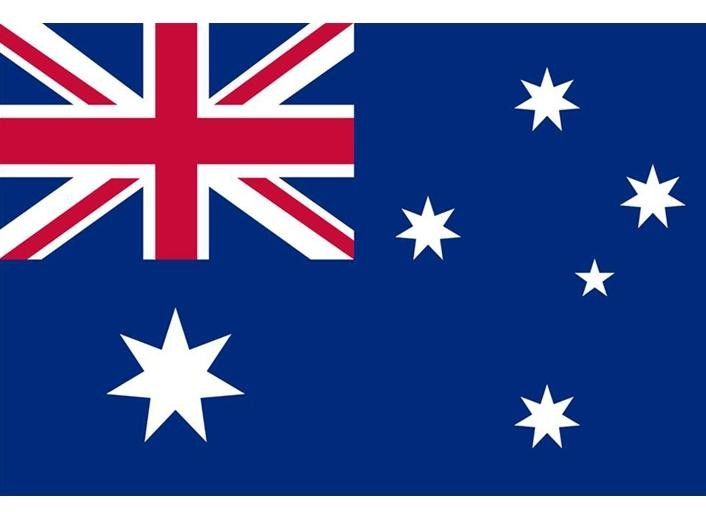
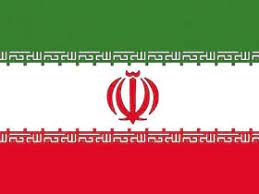
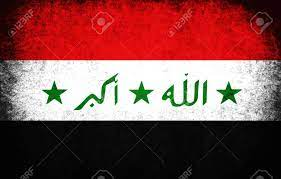
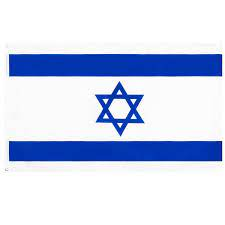
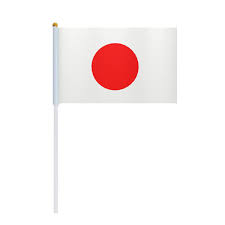
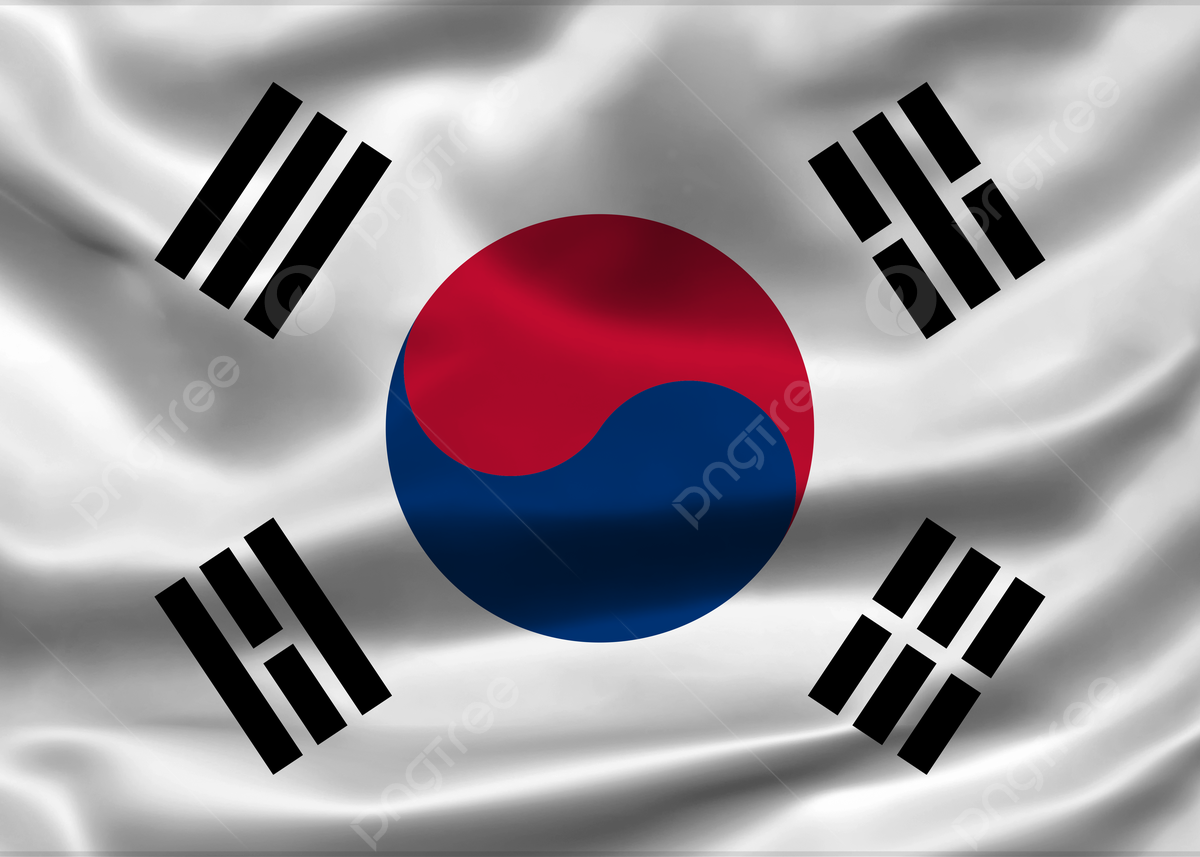
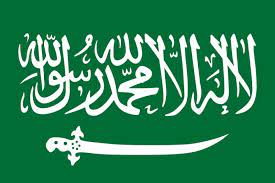

In [108]:
Soccer = folium.Map(location= [7 , 87.0],zoom_start=2.5,tiles='Stamen Terrain')
for i in real_df.index:
    lat= real_df.loc[i,'Lat']
    lng=real_df.loc[i,'Long']
    popup_style = "font-size: 16px;"
    content = real_df.loc[i,'country']
    popup_content = f'<div style="{popup_style}">{content}</div>'
    popup = folium.Popup(popup_content, max_width=300, auto_open=True)
    
    icon = folium.CustomIcon(
    icon_image=image_path[i],
    icon_size=(20,20),  # 이미지 크기 조절
    icon_anchor=(0,0),  # 이미지 위치 조절)
    )
    
    
    
    
    folium.Marker(
    location=[lat,lng],
    popup=popup,
    icon=icon
    ).add_to(Soccer)
    
    folium.CircleMarker(color = 'red',
                        radius =real_df.loc[i,'percent'],
                        fill_color='green',
                        fill=True,
                        location=[lat,lng]).add_to(Soccer)
folium.TileLayer(tiles='Stamen Terrain').add_to(Soccer)
folium.LayerControl().add_to(Soccer)
Soccer

Heatmap 시각화 그리기

In [109]:
Soccer = folium.Map(location= [7 , 87.0],zoom_start=2.5,tiles='Stamen Toner')
heatMap = HeatMap(zip(mapping_df.Lat,mapping_df.Long,mapping_df.potential),
                   min_opacity=0.1,
                   max_val=mapping_df.potential.max(),
                   radius=18, blur=15,
                   max_zoom=10,color='red')
Soccer.add_child(heatMap)

C:\Users\user\AppData\Local\Temp\ipykernel_2132\1677057265.py:3: UserWarning:

The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.



In [110]:
df.select_dtypes('Int64').corr()

,overall,potential,value,wage,age,season
overall,1.000000,0.694692,0.428043,0.519719,0.446343,-0.085904
potential,0.694692,1.000000,0.411398,0.431423,-0.211957,-0.071638
value,0.428043,0.411398,1.000000,0.745993,0.026639,0.044565
wage,0.519719,0.431423,0.745993,1.000000,0.121676,-0.122565
age,0.446343,-0.211957,0.026639,0.121676,1.000000,0.065566
season,-0.085904,-0.071638,0.044565,-0.122565,0.065566,1.000000


In [111]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=dd.country, values=dd.potential,
                             text=dd.country, title='아시아 국가 유망주 선수 비율'
                            )])
fig.show()

각 시즌 별 TOP 10 나라 차트

In [112]:
grouped = df.groupby(['season'])

# 각 그룹에서 'overall' 열을 기준으로 내림차순으로 정렬하고, 상위 10개 값을 선택합니다.
top_10 = grouped.apply(lambda x: x.sort_values(by='overall', ascending=False).head(10))

top_10.sort_values(by = 'overall',ascending=False,inplace=True)

In [114]:
fig = px.bar(top_10, x="season", y="overall", color="country"
             ,title='each season top 10 country' )
fig.show()

시즌 별 Top10 선수 빈도 워드클라우드

In [275]:
tagcountt=pd.DataFrame(top_10.groupby(['name','country']).season.count()).reset_index()



In [283]:
tagcountt.sort_values(by='season',ascending=False)

,name,country,season
11,H. Son,Korea Republic,10
30,S. Kagawa,Japan,6
23,M. Ryan,Australia,5
14,K. Honda,Japan,5
16,Ki Sung Yueng,Korea Republic,4
36,T. Inui,Japan,4
32,S. Okazaki,Japan,4
25,M. Taremi,Iran,3
10,H. Sakai,Japan,3
41,W. Endo,Japan,3


In [264]:
top_10

overall  potential            name         country      value  \
season                                                                        
23     12216       89         89          H. Son  Korea Republic  101000000   
22     10280       89         89          H. Son  Korea Republic  104000000   
20     6665        87         88          H. Son  Korea Republic   60000000   
24     13716       87         87          H. Son  Korea Republic   77000000   
21     8467        87         87          H. Son  Korea Republic   85000000   
...               ...        ...             ...             ...        ...   
15     7           76         81    Koo Ja Cheol  Korea Republic    6500000   
       6           76         76  N. Al Shamrani    Saudi Arabia    5000000   
20     6679        76         76   Ki Sung Yueng  Korea Republic    7000000   
       6677        76         76         A. Mooy       Australia    7500000   
15     9           75         78     H. Kiyotake           Japan    4000000   

                wage  age  season  
season                             
23     12216  240000   29      23  
22     10280  220000   28      22  
20     6665   180000   26      20  
24     13716  170000   30      24  
21     8467   165000   27      21  
...              ...  ...     ...  
15     7       60000   25      15  
       6       80000   30      15  
20     6679    37000   30      20  
       6677    36000   28      20  
15     9       35000   24      15  

[100 rows x 8 columns]

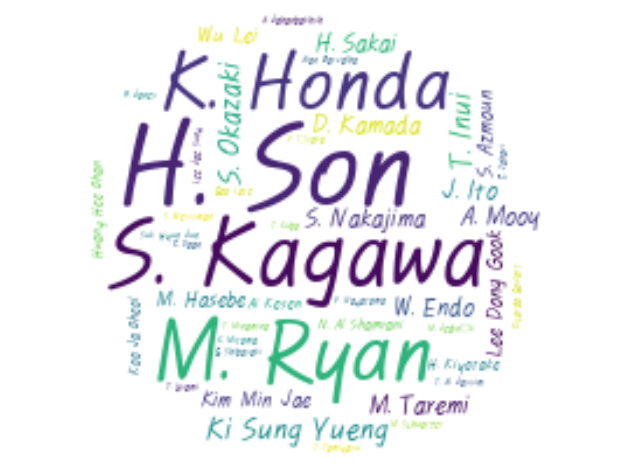

In [255]:
plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [6.5, 6]})        # 가로 세로 크기 설정
font="C:\Windows\Fonts\HMFMPYUN.TTF"
df_word = tagcountt.query('season >= 1')
df_word = df_word.sort_values('season', ascending=False)
df_word = df_word
masks = np.array(Image.open('s_ball.png'))

dic_nouns = df_word.set_index('name').to_dict()['season']

wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',
               mask=masks)
img_wordcloud = wc.generate_from_frequencies(dic_nouns)
plt.imshow(img_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

각 시즌 별 최고 기량의 선수 데이터 시각화

In [115]:
grouped= df.groupby('name')

filtered_df = grouped.apply(lambda x : x.sort_values(by='overall',ascending =False).iloc[0])

# 모든 시즌 중 최고의 기량인 시즌을 갖춘 선수의 데이터
# 즉 피파 카드에서 사용하고 싶은 선수의 최고 기량 시즌
filtered_df


,overall,potential,name,country,value,wage,age,season
name,,,,,,,,
A Lan,77,77,A Lan,China PR,9000000,27000,31,22
A. Abass,58,58,A. Abass,Saudi Arabia,100000,2000,30,16
A. Abbas,64,64,A. Abbas,Iraq,325000,4000,29,17
A. Abdu,65,71,A. Abdu,Saudi Arabia,750000,6000,22,20
A. Abdugheni,61,66,A. Abdugheni,China PR,450000,3000,25,24
...,...,...,...,...,...,...,...,...
Zhu Zhengyu,51,57,Zhu Zhengyu,China PR,50000,2000,23,19
Zou Dehai,65,69,Zou Dehai,China PR,750000,4000,27,21
Zou Zheng,68,68,Zou Zheng,China PR,650000,7000,30,19


In [116]:
grouped= df.groupby('name')
filtered_df = grouped.apply(lambda x : x.sort_values(by='overall',ascending =False).iloc[0])
filtered_df

,overall,potential,name,country,value,wage,age,season
name,,,,,,,,
A Lan,77,77,A Lan,China PR,9000000,27000,31,22
A. Abass,58,58,A. Abass,Saudi Arabia,100000,2000,30,16
A. Abbas,64,64,A. Abbas,Iraq,325000,4000,29,17
A. Abdu,65,71,A. Abdu,Saudi Arabia,750000,6000,22,20
A. Abdugheni,61,66,A. Abdugheni,China PR,450000,3000,25,24
...,...,...,...,...,...,...,...,...
Zhu Zhengyu,51,57,Zhu Zhengyu,China PR,50000,2000,23,19
Zou Dehai,65,69,Zou Dehai,China PR,750000,4000,27,21
Zou Zheng,68,68,Zou Zheng,China PR,650000,7000,30,19


In [117]:
filtered_df.sort_values('overall',ascending=False)

,overall,potential,name,country,value,wage,age,season
name,,,,,,,,
H. Son,89,89,H. Son,Korea Republic,104000000,220000,28,22
Kim Min Jae,84,86,Kim Min Jae,Korea Republic,46000000,82000,26,24
S. Kagawa,83,83,S. Kagawa,Japan,19000000,140000,25,15
M. Taremi,82,82,M. Taremi,Iran,30000000,23000,30,24
D. Kamada,81,83,D. Kamada,Japan,32500000,37000,25,23
...,...,...,...,...,...,...,...,...
A. Anwar,46,62,A. Anwar,Saudi Arabia,120000,1000,18,23
Zhao Ziye,46,61,Zhao Ziye,China PR,110000,700,18,23
Zhang Jiahui,46,55,Zhang Jiahui,China PR,100000,900,19,23


In [118]:
data= pd.DataFrame(filtered_df.groupby(['season','country']).value.mean()).reset_index()
data


,season,country,value
0,15,Australia,4.066364e+05
1,15,Iran,1.500000e+06
2,15,Japan,3.432000e+06
3,15,Korea Republic,2.914000e+05
4,15,Saudi Arabia,3.039630e+05
...,...,...,...
70,24,Israel,2.927500e+06
71,24,Japan,4.853235e+06
72,24,Korea Republic,1.425927e+06
73,24,Saudi Arabia,5.524126e+05


In [119]:
filtered_df.age.mean()

25.070422535211268

In [120]:
fig = px.violin(filtered_df, x="overall", y="country", color="country"
             ,title='전 시즌별 최고 기량 선수들의 나이 평균' )

fig.update_traces(meanline_visible=True, meanline_color='red')

fig.show()



한 중 일 19 ~ 24 시즌 각 나라 Top 50위 비교

In [121]:
# 한 중 일 시즌 별 50 개 추출

filter_df = df[(df['country'] == 'Japan') | (df['country'] == 'China PR') | (df['country'] == 'Korea Republic')]
filter_df=filter_df.groupby(['season','country']).apply(lambda group : group.nlargest(50,'overall')).reset_index(drop=True)

In [122]:
f_df = filter_df[(filter_df['season'] >= 19) & (filter_df['season'] <= 24)]

In [123]:
f_df.groupby(['season','country']).overall.count()

season  country       
19      China PR          50
        Japan             50
        Korea Republic    50
20      China PR          50
        Japan             50
        Korea Republic    50
21      China PR          50
        Japan             50
        Korea Republic    50
22      China PR          50
        Japan             50
        Korea Republic    50
23      China PR          50
        Japan             50
        Korea Republic    50
24      China PR          50
        Japan             50
        Korea Republic    50
Name: overall, dtype: int64

In [124]:
datas = f_df.pivot_table(index = ['season'],columns=['country'], aggfunc=sum)
datas

C:\Users\user\AppData\Local\Temp\ipykernel_2132\1681967685.py:1: FutureWarning:

The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



age                       overall                      potential  \
country China PR Japan Korea Republic China PR Japan Korea Republic  China PR   
season                                                                          
19          1420  1408           1374     3448  3656           3562      3499   
20          1468  1395           1415     3446  3651           3588      3480   
21          1502  1402           1457     3479  3633           3578      3508   
22          1502  1404           1413     3457  3648           3567      3486   
23          1518  1335           1459     3380  3595           3573      3409   
24          1498  1329           1409     3397  3653           3618      3435   

                                  value                               wage  \
country Japan Korea Republic   China PR      Japan Korea Republic China PR   
season                                                                       
19       3740           3657   64235000  232310000      164825000   423000   
20       3764           3658   69725000  226724999      199424998   450000   
21       3714           3627  122040000  190274999      205049999   498000   
22       3749           3643   98975000  211359998      223350000   471000   
23       3737           3643   43555000  247175000      231125000   302000   
24       3772           3706   53100000  345400000      273524999   372000   

                                 
country    Japan Korea Republic  
season                           
19        834000         522000  
20        754000         646000  
21        742900         646000  
22        841000         683000  
23        832000         754000  
24       1081600         824000

In [126]:
datas

age                       overall                      potential  \
country China PR Japan Korea Republic China PR Japan Korea Republic  China PR   
season                                                                          
19          1420  1408           1374     3448  3656           3562      3499   
20          1468  1395           1415     3446  3651           3588      3480   
21          1502  1402           1457     3479  3633           3578      3508   
22          1502  1404           1413     3457  3648           3567      3486   
23          1518  1335           1459     3380  3595           3573      3409   
24          1498  1329           1409     3397  3653           3618      3435   

                                  value                               wage  \
country Japan Korea Republic   China PR      Japan Korea Republic China PR   
season                                                                       
19       3740           3657   64235000  232310000      164825000   423000   
20       3764           3658   69725000  226724999      199424998   450000   
21       3714           3627  122040000  190274999      205049999   498000   
22       3749           3643   98975000  211359998      223350000   471000   
23       3737           3643   43555000  247175000      231125000   302000   
24       3772           3706   53100000  345400000      273524999   372000   

                                 
country    Japan Korea Republic  
season                           
19        834000         522000  
20        754000         646000  
21        742900         646000  
22        841000         683000  
23        832000         754000  
24       1081600         824000

In [127]:
fig = make_subplots(rows=2, cols=2,
                    horizontal_spacing= 0.15,
                   subplot_titles=('<b>한 중 일 시즌별 top50 나이</b>','<b>한 중 일 시즌별 top50 가치</b>','<b>한 중 일 시즌별 top50 잠재력</b>','<b>한 중 일 시즌별 top50 능력치</b>'))

colors = {'Korea Republic': 'blue', 'China PR': 'red', 'Japan': 'green'}
for col in datas['age'].columns:
    fig.add_trace(go.Scatter(x=datas.index,y= datas['age'][col]/50,
                 mode='lines+markers+text',name=col ,line=dict(color=colors[col]),text=datas['age'][col]/50,textposition='bottom center'),row=1,col=1)
    fig.add_trace(go.Scatter(x=datas.index,y= datas['value'][col],
                 mode='lines+markers+text', name=col,line=dict(color=colors[col]),showlegend=False,text=datas['value'][col],textposition='bottom center'),row=1,col=2)
    fig.add_trace(go.Scatter(x=datas.index,y= datas['potential'][col],
                 mode='lines+markers+text', name=col,line=dict(color=colors[col]),showlegend=False,text=datas['potential'][col],textposition='bottom center'),row=2,col=1)
    fig.add_trace(go.Scatter(x=datas.index,y= datas['overall'][col],
             mode='lines+markers+text', name=col,line=dict(color=colors[col]),showlegend=False,text=datas['overall'][col],textposition='bottom center'),row=2,col=2)
    fig.update_traces(textfont=dict(size=5)) 
fig.update_layout(title='K, J, C each season Top 50')
fig.update_xaxes(title_text='Season', row=1, col=1)
fig.update_xaxes(title_text='Season', row=1, col=2)
fig.update_xaxes(title_text='Season', row=2, col=1)
fig.update_xaxes(title_text='Season', row=2, col=2)
fig.update_yaxes(title_text='Age', row=1, col=1)
fig.update_yaxes(title_text='Value', row=1, col=2)
fig.update_yaxes(title_text='Potential', row=2, col=1)
fig.update_yaxes(title_text='Overall', row=2, col=2)
fig.show()